# 도로형태별 자전거 사고

### 사용데이터
- 서울시 자전거 사고 정보 리스트 (2017-2018) [TAAS 도로교통공단]<br>
: 해당 데이터에는 2017-2018년 동안 일어난 모든 자전거 사고에 대한 정보 리스트가 담겨 있다. 

'서울시 자전거 사고 정보 리스트' 데이터를 이용하여 __도로형태별 자전거 사고에 대한 단순통계 및 시각화__를 수행한다.<br>

In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

geo_path = 'data/seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic'

In [2]:
# 자전거 사고 정보 리스트 불러오기

accidList = pd.read_csv('data/accidentInfoList.csv')
accidList.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2017010200100055,2017년 1월 2일 05시,월요일,서울특별시 광진구 화양동,경상사고,0,0,1,0,차대사람 - 기타,...,비,기타 - 기타,자전거,남,27세,상해없음,보행자,여,74세,경상
1,2017010200100060,2017년 1월 2일 06시,월요일,서울특별시 강북구 미아동,중상사고,0,1,0,0,차대차 - 추돌,...,흐림,교차로 - 교차로안,자전거,남,73세,중상,승용,남,39세,상해없음
2,2017010300100168,2017년 1월 3일 09시,화요일,서울특별시 마포구 합정동,경상사고,0,0,1,0,차대차 - 측면충돌,...,흐림,교차로 - 교차로안,자전거,여,45세,경상,승용,남,74세,상해없음
3,2017010300100197,2017년 1월 3일 10시,화요일,서울특별시 영등포구 신길동,경상사고,0,0,1,0,차대차 - 기타,...,맑음,단일로 - 기타,자전거,남,67세,경상,승합,남,35세,상해없음
4,2017010300100201,2017년 1월 3일 10시,화요일,서울특별시 양천구 신정동,경상사고,0,0,1,0,차대차 - 측면충돌,...,맑음,교차로 - 교차로안,자전거,남,13세,경상,승합,남,41세,상해없음


In [3]:
accidList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3127 entries, 0 to 3126
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        3127 non-null   int64 
 1   사고일시        3127 non-null   object
 2   요일          3127 non-null   object
 3   시군구         3127 non-null   object
 4   사고내용        3127 non-null   object
 5   사망자수        3127 non-null   int64 
 6   중상자수        3127 non-null   int64 
 7   경상자수        3127 non-null   int64 
 8   부상신고자수      3127 non-null   int64 
 9   사고유형        3127 non-null   object
 10  법규위반        3127 non-null   object
 11  노면상태        3127 non-null   object
 12  기상상태        3127 non-null   object
 13  도로형태        3127 non-null   object
 14  가해운전자 차종    3127 non-null   object
 15  가해운전자 성별    3127 non-null   object
 16  가해운전자 연령    3127 non-null   object
 17  가해운전자 상해정도  3127 non-null   object
 18  피해운전자 차종    3070 non-null   object
 19  피해운전자 성별    3070 non-null   object
 20  피해운전자 연령

In [4]:
# 도로형태별 사고건수를 확인

road = accidList.groupby('도로형태').size()
road

도로형태
교차로 - 교차로부근         363
교차로 - 교차로안          673
교차로 - 교차로횡단보도내      201
기타 - 기타             334
단일로 - 고가도로위           1
단일로 - 교량             14
단일로 - 기타           1513
단일로 - 지하차도(도로)내      15
단일로 - 터널              2
미분류 - 미분류             6
주차장 - 주차장             5
dtype: int64

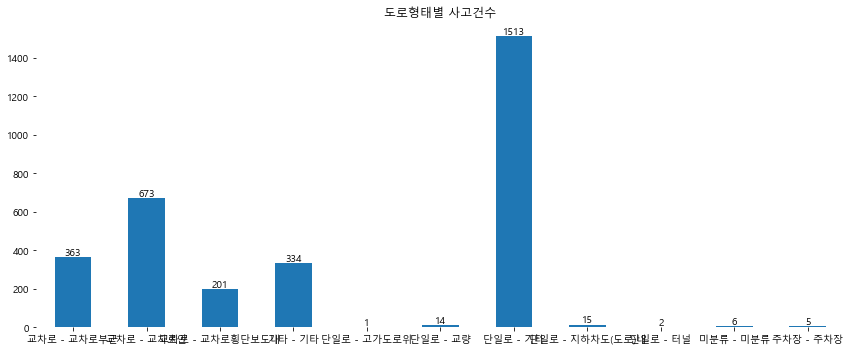

In [5]:
# 도로형태별 사고건수를 그래프로 표시

ax = road.plot(kind='bar', figsize=(12, 5), rot=0, title="도로형태별 사고건수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+10), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

In [6]:
# 불러온 csv 파일에 지역구 column을 만들어 지역구 표시하기

accidList['지역구']=accidList['시군구'].str.split(" ").str[1]
accidList

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,지역구
0,2017010200100055,2017년 1월 2일 05시,월요일,서울특별시 광진구 화양동,경상사고,0,0,1,0,차대사람 - 기타,...,기타 - 기타,자전거,남,27세,상해없음,보행자,여,74세,경상,광진구
1,2017010200100060,2017년 1월 2일 06시,월요일,서울특별시 강북구 미아동,중상사고,0,1,0,0,차대차 - 추돌,...,교차로 - 교차로안,자전거,남,73세,중상,승용,남,39세,상해없음,강북구
2,2017010300100168,2017년 1월 3일 09시,화요일,서울특별시 마포구 합정동,경상사고,0,0,1,0,차대차 - 측면충돌,...,교차로 - 교차로안,자전거,여,45세,경상,승용,남,74세,상해없음,마포구
3,2017010300100197,2017년 1월 3일 10시,화요일,서울특별시 영등포구 신길동,경상사고,0,0,1,0,차대차 - 기타,...,단일로 - 기타,자전거,남,67세,경상,승합,남,35세,상해없음,영등포구
4,2017010300100201,2017년 1월 3일 10시,화요일,서울특별시 양천구 신정동,경상사고,0,0,1,0,차대차 - 측면충돌,...,교차로 - 교차로안,자전거,남,13세,경상,승합,남,41세,상해없음,양천구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,2018122900100411,2018년 12월 29일 20시,토요일,서울특별시 송파구 삼전동,경상사고,0,0,1,0,차대사람 - 기타,...,기타 - 기타,자전거,남,14세,상해없음,보행자,남,37세,경상,송파구
3123,2018123100100041,2018년 12월 31일 05시,월요일,서울특별시 송파구 삼전동,중상사고,0,1,0,0,차대차 - 기타,...,교차로 - 교차로부근,자전거,남,79세,중상,승용,남,77세,상해없음,송파구
3124,2018123100100193,2018년 12월 31일 12시,월요일,서울특별시 노원구 하계동,중상사고,0,1,0,0,차대차 - 측면충돌,...,단일로 - 기타,자전거,남,67세,중상,승용,남,41세,상해없음,노원구
3125,2018123100100347,2018년 12월 31일 16시,월요일,서울특별시 양천구 신월동,경상사고,0,0,1,0,차대차 - 기타,...,교차로 - 교차로안,자전거,남,74세,경상,승용,남,61세,상해없음,양천구


In [7]:
accidList_gu = {}
for idx, df in accidList.groupby('지역구'):
    accidList_road = []
    for i, i_row in df.iterrows():
        accidList_road.append(i_row['도로형태'])
    accidList_gu[idx] = accidList_road
accidList_gu

{'강남구': ['단일로 - 기타',
  '단일로 - 기타',
  '기타 - 기타',
  '단일로 - 기타',
  '단일로 - 기타',
  '교차로 - 교차로부근',
  '교차로 - 교차로부근',
  '기타 - 기타',
  '단일로 - 기타',
  '단일로 - 기타',
  '단일로 - 기타',
  '기타 - 기타',
  '기타 - 기타',
  '기타 - 기타',
  '단일로 - 기타',
  '기타 - 기타',
  '단일로 - 기타',
  '단일로 - 기타',
  '교차로 - 교차로횡단보도내',
  '단일로 - 기타',
  '교차로 - 교차로안',
  '단일로 - 기타',
  '교차로 - 교차로안',
  '기타 - 기타',
  '교차로 - 교차로안',
  '교차로 - 교차로안',
  '기타 - 기타',
  '기타 - 기타',
  '단일로 - 기타',
  '기타 - 기타',
  '단일로 - 기타',
  '단일로 - 기타',
  '단일로 - 기타',
  '단일로 - 기타',
  '단일로 - 기타',
  '교차로 - 교차로안',
  '기타 - 기타',
  '교차로 - 교차로안',
  '단일로 - 기타',
  '기타 - 기타',
  '교차로 - 교차로부근',
  '단일로 - 기타',
  '교차로 - 교차로부근',
  '교차로 - 교차로안',
  '기타 - 기타',
  '기타 - 기타',
  '교차로 - 교차로부근',
  '단일로 - 기타',
  '교차로 - 교차로부근',
  '기타 - 기타',
  '교차로 - 교차로부근',
  '단일로 - 기타',
  '단일로 - 기타',
  '단일로 - 기타',
  '기타 - 기타',
  '교차로 - 교차로횡단보도내',
  '단일로 - 기타',
  '단일로 - 기타',
  '교차로 - 교차로횡단보도내',
  '단일로 - 기타',
  '단일로 - 기타',
  '기타 - 기타',
  '주차장 - 주차장',
  '단일로 - 기타',
  '교차로 - 교차로부근',
  '단일로 - 기타',
  '교차로 - 교차로부근',
  '단일로 - 기타'

In [8]:
# 먼저 지역구별로 묶고, 도로형태별로 사고 건수를 확인

accidList_gu_road = accidList.groupby(['지역구', '도로형태']).size()
accidList_gu_road

지역구  도로형태          
강남구  교차로 - 교차로부근       14
     교차로 - 교차로안        13
     교차로 - 교차로횡단보도내     6
     기타 - 기타           24
     단일로 - 기타          64
                       ..
중랑구  교차로 - 교차로안        56
     교차로 - 교차로횡단보도내    15
     기타 - 기타           18
     단일로 - 기타          79
     미분류 - 미분류          1
Length: 152, dtype: int64

In [9]:
# 사용의 편리성을 위해 데이터프레임으로 변경

accidList_gu_road = accidList_gu_road.to_frame()
accidList_gu_road.columns = ['사고건수']
accidList_gu_road

사고건수
지역구 도로형태                
강남구 교차로 - 교차로부근       14
    교차로 - 교차로안        13
    교차로 - 교차로횡단보도내     6
    기타 - 기타           24
    단일로 - 기타          64
...                  ...
중랑구 교차로 - 교차로안        56
    교차로 - 교차로횡단보도내    15
    기타 - 기타           18
    단일로 - 기타          79
    미분류 - 미분류          1

[152 rows x 1 columns]

In [10]:
accidList_gu_road.columns.values

array(['사고건수'], dtype=object)

In [11]:
# 지역구를 index로 묶었다

accidList_gu_road.reset_index(level=1, inplace=True)

In [12]:
accidList_gu_road

,도로형태,사고건수
지역구,,
강남구,교차로 - 교차로부근,14
강남구,교차로 - 교차로안,13
강남구,교차로 - 교차로횡단보도내,6
강남구,기타 - 기타,24
강남구,단일로 - 기타,64
...,...,...
중랑구,교차로 - 교차로안,56
중랑구,교차로 - 교차로횡단보도내,15
중랑구,기타 - 기타,18


In [13]:
accidList_gu_road.columns.values

array(['도로형태', '사고건수'], dtype=object)

In [14]:
# 지역구별로 가장 사고가 많이 나는 도로형태 확인

max_idx = accidList_gu_road.groupby(['지역구'])['사고건수'].transform(max) == accidList_gu_road['사고건수']
accidList_gu_road[max_idx]

,도로형태,사고건수
지역구,,
강남구,단일로 - 기타,64
강동구,단일로 - 기타,62
강북구,단일로 - 기타,41
강서구,단일로 - 기타,63
관악구,단일로 - 기타,31
광진구,단일로 - 기타,64
구로구,단일로 - 기타,41
금천구,단일로 - 기타,23
노원구,단일로 - 기타,66


In [15]:
# 지역구별로 가장 사고가 적게 나는 도로형태 확인

min_idx = accidList_gu_road.groupby(['지역구'])['사고건수'].transform(min) == accidList_gu_road['사고건수']
accidList_gu_road[min_idx]

,도로형태,사고건수
지역구,,
강남구,주차장 - 주차장,1
강동구,단일로 - 지하차도(도로)내,1
강북구,기타 - 기타,5
강서구,미분류 - 미분류,1
관악구,교차로 - 교차로횡단보도내,2
광진구,단일로 - 교량,3
구로구,단일로 - 고가도로위,1
금천구,기타 - 기타,3
노원구,단일로 - 교량,1


## 도로형태 재분류
2017-2018년의 도로형태 분류와 이전 도로형태 분류를 비교. <br> 2017년 이전 까지의 도로형태가 2017년 이후의 도로형태보다 더 세세하게 분류 되어 있음. <br>
2017년 이후의 도로형태와 이전까지의 분류를 비교해보면 2017년 이후 자료에서 단일로의 상세 분류가 줄어들고 <br> 모두 '단일로-기타'로 들어가 있는 것을 확인. 데이터가 편향되어 있다는 판단하에 재분류함. 

-----------------------------------------------------------------------------------------------------------------------------------

In [16]:
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='교차로 - 교차로부근', repl='교차로', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='교차로 - 교차로안', repl='교차로', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='교차로 - 교차로횡단보도내', repl='교차로', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='단일로 - 고가도로위', repl='고가도로 / 지하도로', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='단일로 - 지하차도(도로)내', repl='고가도로 / 지하도로', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='단일로 - 기타', repl='기타 단일로', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='단일로 - 터널', repl='터널', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='단일로 - 교량', repl='교량', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='기타 - 기타', repl='기타 / 미분류', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='미분류 - 미분류', repl='기타 / 미분류', regex=False)
accidList['도로형태'] = accidList['도로형태'].str.replace(pat='주차장 - 주차장', repl='주차장', regex=False)

In [17]:
accidList

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,...,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,지역구
0,2017010200100055,2017년 1월 2일 05시,월요일,서울특별시 광진구 화양동,경상사고,0,0,1,0,차대사람 - 기타,...,기타 / 미분류,자전거,남,27세,상해없음,보행자,여,74세,경상,광진구
1,2017010200100060,2017년 1월 2일 06시,월요일,서울특별시 강북구 미아동,중상사고,0,1,0,0,차대차 - 추돌,...,교차로,자전거,남,73세,중상,승용,남,39세,상해없음,강북구
2,2017010300100168,2017년 1월 3일 09시,화요일,서울특별시 마포구 합정동,경상사고,0,0,1,0,차대차 - 측면충돌,...,교차로,자전거,여,45세,경상,승용,남,74세,상해없음,마포구
3,2017010300100197,2017년 1월 3일 10시,화요일,서울특별시 영등포구 신길동,경상사고,0,0,1,0,차대차 - 기타,...,기타 단일로,자전거,남,67세,경상,승합,남,35세,상해없음,영등포구
4,2017010300100201,2017년 1월 3일 10시,화요일,서울특별시 양천구 신정동,경상사고,0,0,1,0,차대차 - 측면충돌,...,교차로,자전거,남,13세,경상,승합,남,41세,상해없음,양천구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3122,2018122900100411,2018년 12월 29일 20시,토요일,서울특별시 송파구 삼전동,경상사고,0,0,1,0,차대사람 - 기타,...,기타 / 미분류,자전거,남,14세,상해없음,보행자,남,37세,경상,송파구
3123,2018123100100041,2018년 12월 31일 05시,월요일,서울특별시 송파구 삼전동,중상사고,0,1,0,0,차대차 - 기타,...,교차로,자전거,남,79세,중상,승용,남,77세,상해없음,송파구
3124,2018123100100193,2018년 12월 31일 12시,월요일,서울특별시 노원구 하계동,중상사고,0,1,0,0,차대차 - 측면충돌,...,기타 단일로,자전거,남,67세,중상,승용,남,41세,상해없음,노원구
3125,2018123100100347,2018년 12월 31일 16시,월요일,서울특별시 양천구 신월동,경상사고,0,0,1,0,차대차 - 기타,...,교차로,자전거,남,74세,경상,승용,남,61세,상해없음,양천구


In [18]:
# 재분류한 도로형태 지역구별 사고건수 확인하기

accidList_new = accidList.groupby(['지역구', '도로형태']).size()
accidList_new

지역구  도로형태       
강남구  교차로            33
     기타 / 미분류       24
     기타 단일로         64
     주차장             1
강동구  고가도로 / 지하도로     1
                    ..
중구   기타 / 미분류        2
     기타 단일로         11
중랑구  교차로            94
     기타 / 미분류       19
     기타 단일로         79
Length: 98, dtype: int64

In [19]:
accidList_new = accidList_new.to_frame()
accidList_new

0
지역구 도로형태           
강남구 교차로          33
    기타 / 미분류     24
    기타 단일로       64
    주차장           1
강동구 고가도로 / 지하도로   1
...              ..
중구  기타 / 미분류      2
    기타 단일로       11
중랑구 교차로          94
    기타 / 미분류     19
    기타 단일로       79

[98 rows x 1 columns]

In [20]:
accidList_new.columns.values

array([0], dtype=int64)

In [21]:
# 지역구를 index 컬럼으로 하였고, 각각 도로형태와 사고건수 컬럼을 추가하였다.

accidList_new.columns = ['사고건수']
accidList_new.reset_index(level=1, inplace=True)
accidList_new.columns.values

array(['도로형태', '사고건수'], dtype=object)

In [22]:
accidList_new

,도로형태,사고건수
지역구,,
강남구,교차로,33
강남구,기타 / 미분류,24
강남구,기타 단일로,64
강남구,주차장,1
강동구,고가도로 / 지하도로,1
...,...,...
중구,기타 / 미분류,2
중구,기타 단일로,11
중랑구,교차로,94


In [23]:
# 도로형태 재분류를 진행 한 뒤, 지역구별 가장 사고가 많이 발생한 도로형태를 찾아보았고,
# 기존 분류에서 모든 사고가 기타단일로에서 가장 많이 발생하였다고 나왔지만 재분류 후, 10개의 지역구에서 교차로에서 사고가 가장 많이 발생했음

max_idx_new = accidList_new.groupby(['지역구'])['사고건수'].transform(max) == accidList_new['사고건수']
accidList_new[max_idx_new]

,도로형태,사고건수
지역구,,
강남구,기타 단일로,64
강동구,교차로,66
강북구,교차로,41
강북구,기타 단일로,41
강서구,교차로,65
관악구,기타 단일로,31
광진구,기타 단일로,64
구로구,교차로,53
금천구,교차로,25


In [24]:
# 오름찻순으로 정렬하였다.

accidList_new_sort = accidList_new[max_idx_new].sort_values(["사고건수"], ascending=[False])
accidList_new_sort

,도로형태,사고건수
지역구,,
송파구,기타 단일로,196
영등포구,기타 단일로,183
동대문구,기타 단일로,98
중랑구,교차로,94
노원구,교차로,67
강동구,교차로,66
강서구,교차로,65
강남구,기타 단일로,64
광진구,기타 단일로,64


In [25]:
# 도로형태 재분류를 진행 한 뒤, 지역구별 가장 사고가 적게 발생한 도로형태를 찾아보았고 기존 분류와 재분류가 같은 수치를 나타냄.

min_idx_new = accidList_new.groupby(['지역구'])['사고건수'].transform(min) == accidList_new['사고건수']
accidList_new[min_idx_new]

,도로형태,사고건수
지역구,,
강남구,주차장,1
강동구,고가도로 / 지하도로,1
강북구,기타 / 미분류,5
강서구,기타 / 미분류,18
관악구,기타 / 미분류,6
광진구,교량,3
구로구,고가도로 / 지하도로,1
금천구,기타 / 미분류,3
노원구,교량,1


In [26]:
# 재분류한 도로형태별 사고건수 확인하기

road = accidList.groupby('도로형태').size()
road

도로형태
고가도로 / 지하도로      16
교량               14
교차로            1237
기타 / 미분류        340
기타 단일로         1513
주차장               5
터널                2
dtype: int64

In [27]:
road_df = road.to_frame()
road_df.columns = ['사고건수']
road_df

,사고건수
도로형태,
고가도로 / 지하도로,16
교량,14
교차로,1237
기타 / 미분류,340
기타 단일로,1513
주차장,5
터널,2


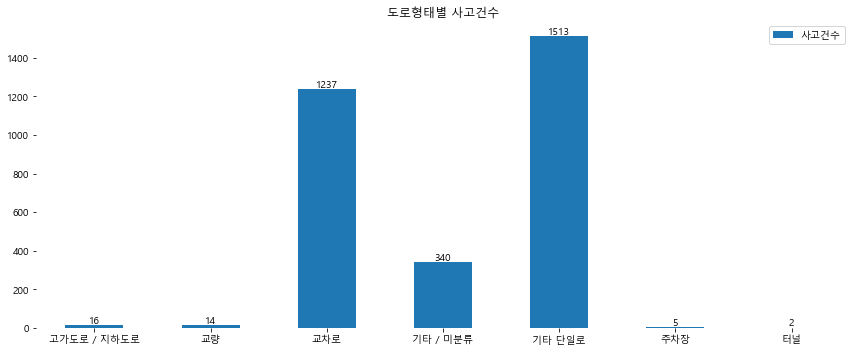

In [28]:
# 재분류한 도로형태별 사고건수를 보면 여전히 기타단일로에서 가장 많이 발생하고 그 다음 교차로에서 사고가 많이 발생하였다.

ax = road_df.plot(kind='bar', figsize=(12, 5), rot=0, title="도로형태별 사고건수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+10), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

In [29]:
# 도로형태별 사고건수 전부 더하기

road_total = road.sum()
road_total

3127

In [30]:
# 도로형태별 사고건수 백분율 구하고 변환하기

road_percent = (accidList.groupby('도로형태').size()/road_total) * 100
road_percent

도로형태
고가도로 / 지하도로     0.511673
교량              0.447713
교차로            39.558682
기타 / 미분류       10.873041
기타 단일로         48.385034
주차장             0.159898
터널              0.063959
dtype: float64

In [31]:
# 도로형태별 사고건수 백분율 데이터 프레임으로 변환

road_percent_df = road_percent.to_frame()
road_percent_df

,0
도로형태,
고가도로 / 지하도로,0.511673
교량,0.447713
교차로,39.558682
기타 / 미분류,10.873041
기타 단일로,48.385034
주차장,0.159898
터널,0.063959


In [32]:
# 도로형태별 사고건수 백분율 데이터 프레임에 '사고건수 백분율' 컬럼명 추가

road_percent_df.columns = ['사고건수 백분율']
road_percent_df

,사고건수 백분율
도로형태,
고가도로 / 지하도로,0.511673
교량,0.447713
교차로,39.558682
기타 / 미분류,10.873041
기타 단일로,48.385034
주차장,0.159898
터널,0.063959


In [33]:
# 도로형태별 사고건수 백분율 데이터 프레임에 '사고건수 백분율' 일의 자리까지 반올림

road_percent_df['사고건수 백분율'] = road_percent_df['사고건수 백분율'].round(0)
road_percent_df

,사고건수 백분율
도로형태,
고가도로 / 지하도로,1.0
교량,0.0
교차로,40.0
기타 / 미분류,11.0
기타 단일로,48.0
주차장,0.0
터널,0.0


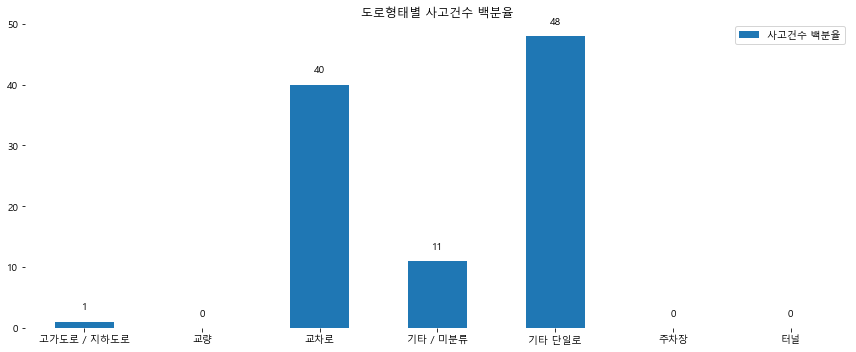

In [34]:
# 도로형태별 사고건수 백분율 그래프로 확인
# 교차로와 기타 단일로에서 발생하는 사고건수가 전체 건수중 88%를 차지.

ax = road_percent_df.plot(kind='bar', figsize=(12, 5), rot=0, title="도로형태별 사고건수 백분율")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

In [36]:
# 도로형태별 부상자수를 알아보기 위해 중상자수와 경장사수를 합하여 하나의 데이터 프레임으로 만들기 

seriously_injury = accidList.groupby('도로형태')
seriously_injury_count = seriously_injury.sum()['중상자수']
seriously_injury_count = seriously_injury_count.to_frame()

slightly_injury = accidList.groupby('도로형태')
slightly_injury_count = slightly_injury.sum()['경상자수']
slightly_injury_count = slightly_injury_count.to_frame()

injury = pd.concat([seriously_injury_count, slightly_injury_count], axis=1)
injury

,중상자수,경상자수
도로형태,,
고가도로 / 지하도로,2,10
교량,3,7
교차로,258,634
기타 / 미분류,106,191
기타 단일로,401,834
주차장,2,2
터널,0,2


In [37]:
# 중상자수와 경상자수를 더하고 새로운 컬럼인 부상자수에 대입. 필요한 부상자수만 남겨두고 나머지 중상자수와 경상자수 컬럼은 삭제.

injury['부상자수'] = injury['중상자수'] + injury['경상자수']
injury_count = injury['부상자수']
injury_count_df = injury_count.to_frame()
injury_count_df.columns = ['부상자수']
injury_count_df

,부상자수
도로형태,
고가도로 / 지하도로,12
교량,10
교차로,892
기타 / 미분류,297
기타 단일로,1235
주차장,4
터널,2


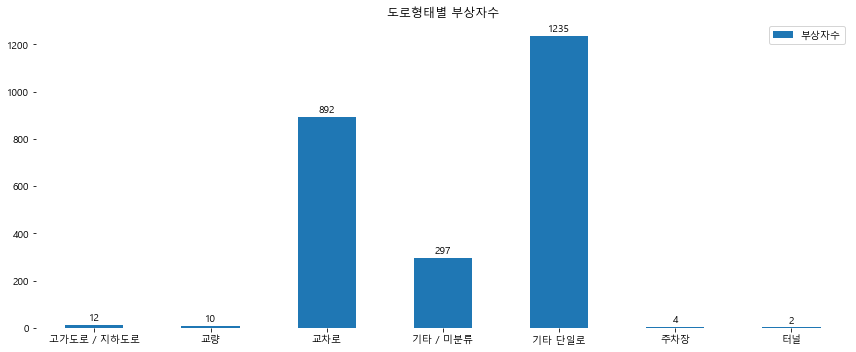

In [38]:
# 재분류한 도로형태별 부상자수를 그래프로 표시했다.

ax = injury_count_df.plot(kind='bar', figsize=(12, 5), rot=0, title="도로형태별 부상자수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+20), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

In [39]:
# 부상자수 백분율 구하기

injury_total = injury['부상자수'].sum()
injury_percent = (injury['부상자수'] / injury_total) * 100
injury_percent

도로형태
고가도로 / 지하도로     0.489396
교량              0.407830
교차로            36.378467
기타 / 미분류       12.112561
기타 단일로         50.367047
주차장             0.163132
터널              0.081566
Name: 부상자수, dtype: float64

In [40]:
injury_percent = injury_percent.round(0)
injury_percent_df = injury_percent.to_frame()
injury_percent_df.columns = ['부상자수 백분율']
injury_percent_df

,부상자수 백분율
도로형태,
고가도로 / 지하도로,0.0
교량,0.0
교차로,36.0
기타 / 미분류,12.0
기타 단일로,50.0
주차장,0.0
터널,0.0


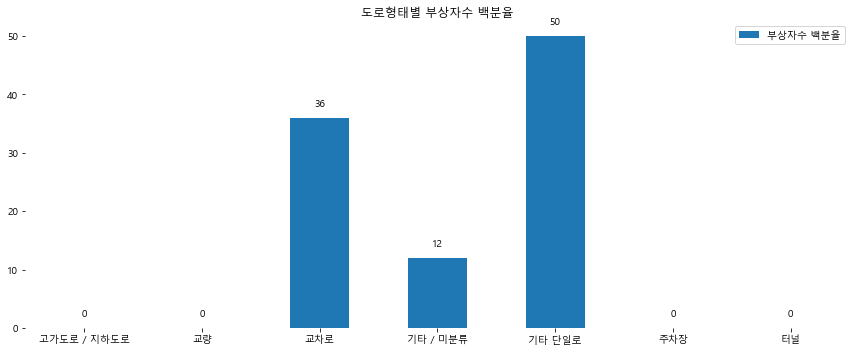

In [41]:
# 부상자수 백분율을 그래프로 표시

ax = injury_percent_df.plot(kind='bar', figsize=(12, 5), rot=0, title="도로형태별 부상자수 백분율")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

In [42]:
# 도로형태별 사망자수 확인하기

dead = accidList.groupby('도로형태')
dead_count = dead.sum()['사망자수']
dead_count

도로형태
고가도로 / 지하도로     1
교량              1
교차로            18
기타 / 미분류        0
기타 단일로         14
주차장             0
터널              0
Name: 사망자수, dtype: int64

In [43]:
dead_count_df = dead_count.to_frame()
dead_count_df.columns = ['사망자수']
dead_count_df

,사망자수
도로형태,
고가도로 / 지하도로,1
교량,1
교차로,18
기타 / 미분류,0
기타 단일로,14
주차장,0
터널,0


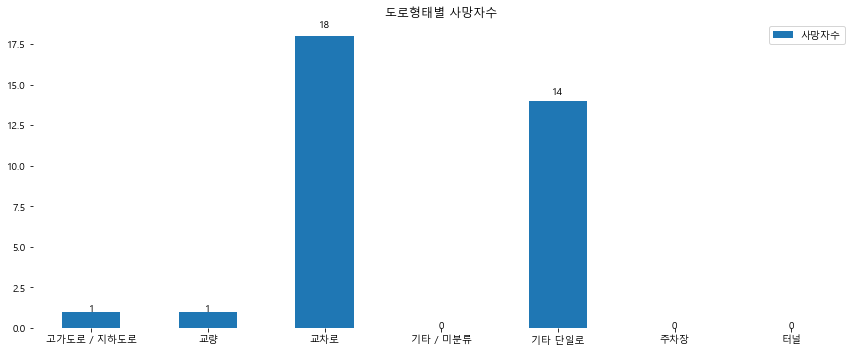

In [44]:
# 재분류한 도로형태별 사망자수 그래프로 확인하기

ax = dead_count_df.plot(kind='bar', figsize=(12, 5), rot=0, title="도로형태별 사망자수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.03), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

In [45]:
# 도로형태별 사망자 백분율

dead_total = dead_count.sum()
dead_percent = (dead_count/dead_total) * 100
dead_percent

도로형태
고가도로 / 지하도로     2.941176
교량              2.941176
교차로            52.941176
기타 / 미분류        0.000000
기타 단일로         41.176471
주차장             0.000000
터널              0.000000
Name: 사망자수, dtype: float64

In [46]:
# 도로형태별 사망자수 백분율 데이터 프레임에 '사망자수 백분율' 일의 자리까지 반올림

dead_percent_df = dead_percent.to_frame()
dead_percent_df.columns = ['사망자수 백분율']
dead_percent_df['사망자수 백분율'] = dead_percent_df['사망자수 백분율'].round(0)
dead_percent_df

,사망자수 백분율
도로형태,
고가도로 / 지하도로,3.0
교량,3.0
교차로,53.0
기타 / 미분류,0.0
기타 단일로,41.0
주차장,0.0
터널,0.0


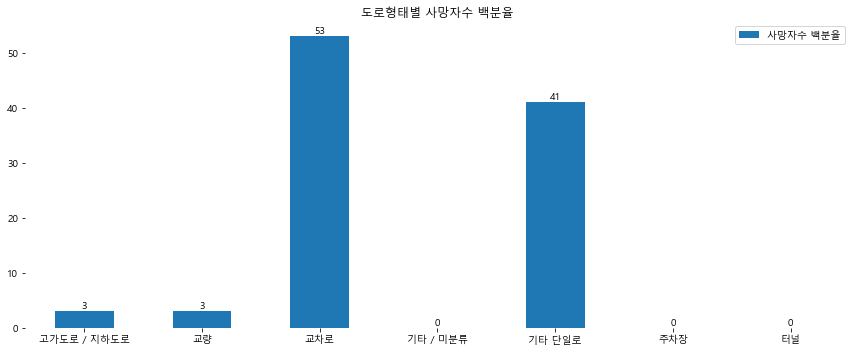

In [47]:
# 도로형태별 사망자수 백분율 그래프로 확인하기

ax = dead_percent_df.plot(kind='bar', figsize=(12, 5), rot=0, title="도로형태별 사망자수 백분율")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+0.5), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

### 결론
도로형태별 사고건수만을 봤을 때, 기타 단일로, 교차로 순으로 많았다. <br> 두 종류의 도로형태에서 발생한 사고 건수가 전체 사고건수 중 88%를 차지하여 대부분의 자전거 사고는 기타단일로와 교차로에서 발생한다고 보면 된다. <br> 부상자수의 경우 사고가 가장 많이 발생하는 기타 단일로에서 가장 많은 부상자수를 배출하였으나 사망자 수의 경우 더 기타 단일로 보다 교차로에서 더 많이 나왔다. 이는 자전거 사고 자체는 기타 단일로에서 가장 많이 발생하지만, 자전거 사고가 발생했을 때 더 치명적인 즉, 치사율이 높은 도로형태는 교차로라고 할 수 있다.